In [0]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

In [2]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',

    split = (tfds.Split.TRAIN, tfds.Split.TEST),

    as_supervised=True,

    with_info=True
)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D7WMF/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D7WMF/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D7WMF/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [5]:
print(f"Vocabulary size: {encoder.vocab_size}")

Vocabulary size: 8185


In [10]:
sample_string = 'I am Dilawar'

encoded_string = encoder.encode(sample_string)
print(f"Encoded string is {encoded_string}")

original_string = encoder.decode(encoded_string)
print(f"The original string: {original_string}")

Encoded string is [12, 258, 1266, 3401, 628]
The original string: I am Dilawar


In [11]:
for ts in encoded_string:
  print(f"{ts} ----> {encoder.decode([ts])}")

12 ----> I 
258 ----> am 
1266 ----> Di
3401 ----> law
628 ----> ar


In [12]:
for train_example, train_label in train_data.take(1):
  print(f"Encoded text: {train_example[:10].numpy()}")
  print(f"Label: {train_label.numpy()}")

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [13]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32)
)

test_batches = (
    test_data
    .padded_batch(32)
)

In [17]:
for example_batch, label_batch in train_batches.take(2):
  print(f"Batch shape: {example_batch.shape}")
  print(f"label shape: {label_batch.shape}")

Batch shape: (32, 1109)
label shape: (32,)
Batch shape: (32, 1043)
label shape: (32,)


In [18]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6803 - accuracy: 0.5007 - val_loss: 0.6609 - val_accuracy: 0.5052
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.6163 - accuracy: 0.5590 - val_loss: 0.5919 - val_accuracy: 0.6250
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5369 - accuracy: 0.6710 - val_loss: 0.5294 - val_accuracy: 0.7323
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4707 - accuracy: 0.7555 - val_loss: 0.4791 - val_accuracy: 0.7656
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.4185 - accuracy: 0.8062 - val_loss: 0.4423 - val_accuracy: 0.7833
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3785 - accuracy: 0.8357 - val_loss: 0.4157 - val_accuracy: 0.8052
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3463 - accuracy: 0.8538 - val_loss: 0.3950 - val_accuracy: 0.8406
Epoch 

In [21]:
loss, accuracy = model.evaluate(test_batches)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

782/782 [==============================] - 4s 5ms/step - loss: 0.3311 - accuracy: 0.8532
Loss: 0.33107584714889526
Accuracy: 0.8532400131225586


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

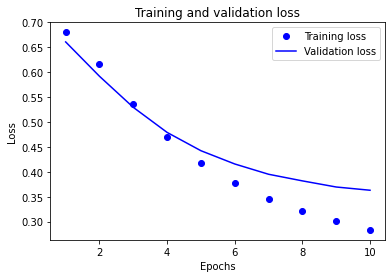

In [24]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

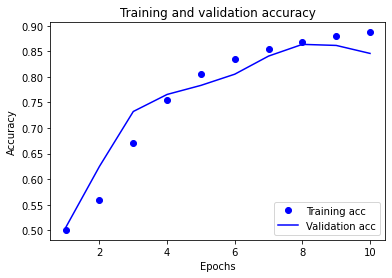

In [25]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()